In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls /content/drive/MyDrive/Online_fraud_detection

'Copy of fraud_prediction.ipynb'   detector.py		       Label_encoder.jb
 dataset.csv			   Fraud_detection_part_2.jb


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("/content/drive/MyDrive/Online_fraud_detection/dataset.csv")

In [9]:
data.shape

(1296675, 23)

In [10]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] = data['trans_date_trans_time'].dt.day
data['month'] = data['trans_date_trans_time'].dt.month

In [12]:
drop_columns = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num']
data = data.drop(columns = drop_columns)

In [13]:
data.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,1,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,0,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,0,1,1


In [14]:
data.shape

(1296675, 15)

In [15]:
data.describe()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,1.280486e+01,1.558798e+01,6.142150e+00
std,1.308806e+18,1.603160e+02,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,6.817824e+00,8.829121e+00,3.417703e+00
min,6.041621e+10,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,7.000000e+00,8.000000e+00,3.000000e+00
50%,3.521417e+15,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,1.400000e+01,1.500000e+01,6.000000e+00
75%,4.642255e+15,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,1.900000e+01,2.300000e+01,9.000000e+00
max,4.992346e+18,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   merchant    1296675 non-null  object 
 2   category    1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   gender      1296675 non-null  object 
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
 12  hour        1296675 non-null  int32  
 13  day         1296675 non-null  int32  
 14  month       1296675 non-null  int32  
dtypes: float64(5), int32(3), int64(4), object(3)
memory usage: 133.6+ MB


In [17]:
#encoding categorical data

from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

categories = ['merchant', 'category', 'gender']
for col in categories:
  data[col + '_label'] = le_encoder.fit_transform(data[col])


In [18]:
data.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,merchant_label,category_label,gender_label
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,1,1,514,8,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,1,1,241,4,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1,1,390,0,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,0,1,1,360,2,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,0,1,1,297,9,1


In [19]:
#distance between transaction and marchent location
from geopy.distance import geodesic

def calculate_distance(lat1,lon1, lat2, lon2):
  return np.array(geodesic((a,b),(c,d)).km for a, b, c, d in zip(lat1,lon1, lat2, lon2))

data['distance'] = calculate_distance(data['lat'], data['long'], data['merch_lat'], data['merch_long'])

In [20]:
data.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,merchant_label,category_label,gender_label,distance
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,1,1,514,8,0,78.773821
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,1,1,241,4,0,30.216618
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1,1,390,0,1,108.102912
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,0,1,1,360,2,1,95.685115
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,0,1,1,297,9,1,77.702395


In [21]:
features = ['merchant_label', 'category_label', 'amt', 'cc_num', 'hour', 'day', 'month', 'gender_label', 'distance']
x = data[features]
y = data['is_fraud']

In [22]:
count_classes = data['is_fraud'].value_counts()
count_classes

,count
is_fraud,
0,1289169
1,7506


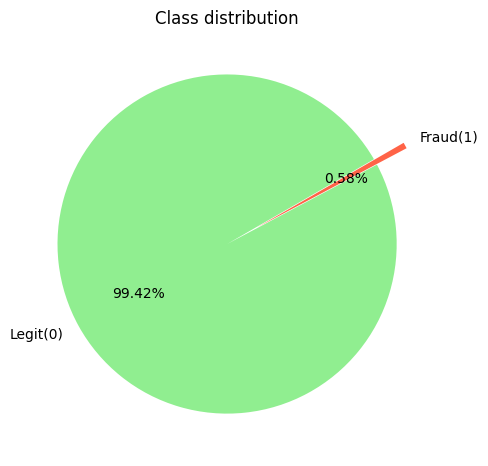

In [23]:
#ploting the figure
# 0 is legit, 1 is fraud
# the data is highlt imbalanced

plt.figure(figsize=(5,5))
plt.title('Class distribution')
plt.tight_layout()
labels = ['Legit(0)', "Fraud(1)"]
colors = ['lightgreen', 'tomato']
plt.pie(count_classes, colors=colors, labels=labels, autopct='%1.2f%%', startangle=30, explode=(0, 0.2))
plt.show()

In [24]:
#Synthetic Minority Over-sampling Technique as the data is highly imbalanced

# Then import sklearn

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

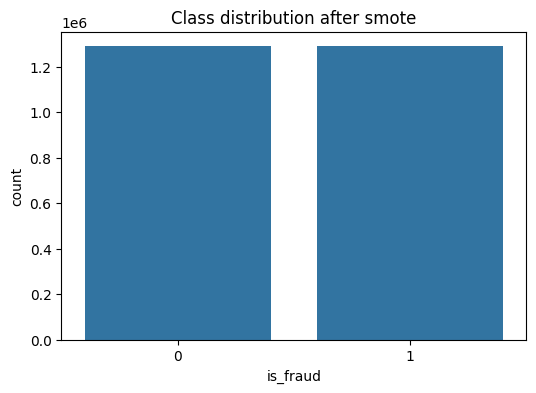

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x = y_resampled)
plt.title('Class distribution after smote')
plt.show()

In [26]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state=42)

In [27]:
#lgb model
import lightgbm as lgb

#data training
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='auc',
    is_unbalance=True,
    learning_rate=0.05,
    num_leaves=64,         # more leaves
    max_depth=6,           # deeper trees
    n_estimators=500,      # more trees
    subsample=0.8,         # bagging
    colsample_bytree=0.8,  # feature sampling
    random_state=42
)

In [28]:
x_train['distance'] = pd.to_numeric(x_train['distance'], errors='coerce')
x_test['distance'] = pd.to_numeric(x_test['distance'], errors='coerce')

# Then fill missing if any were coerced to NaN
x_train['distance'].fillna(x_train['distance'].mean(), inplace=True)
x_test['distance'].fillna(x_test['distance'].mean(), inplace=True)

/tmp/ipython-input-28-2125679722.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['distance'].fillna(x_train['distance'].mean(), inplace=True)
/tmp/ipython-input-28-2125679722.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [29]:
print(x_train['distance'].dtype)  # should print: float64

float64


In [30]:
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 1030687, number of negative: 1031983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.203937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 2062670, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499686 -> initscore=-0.001257
[LightGBM] [Info] Start training from score -0.001257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

LGBMClassifier(colsample_bytree=0.8, is_unbalance=True, learning_rate=0.05,
               max_depth=6, metric='auc', n_estimators=500, num_leaves=64,
               objective='binary', random_state=42, subsample=0.8)

In [31]:
y_pred = lgb_model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[251432   5754]
 [ 14381 244101]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96    257186
           1       0.98      0.94      0.96    258482

    accuracy                           0.96    515668
   macro avg       0.96      0.96      0.96    515668
weighted avg       0.96      0.96      0.96    515668

Accuracy Score: 0.960953559266815


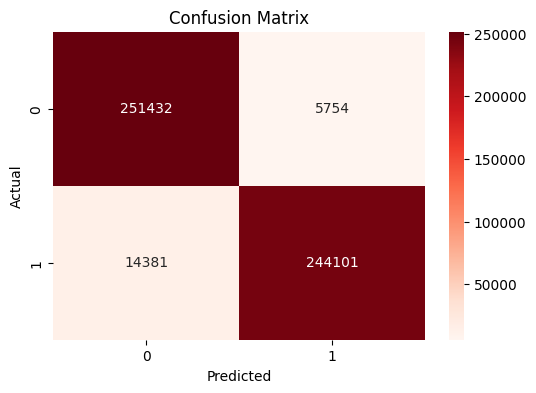

In [ ]:
#visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'plot' is not defined

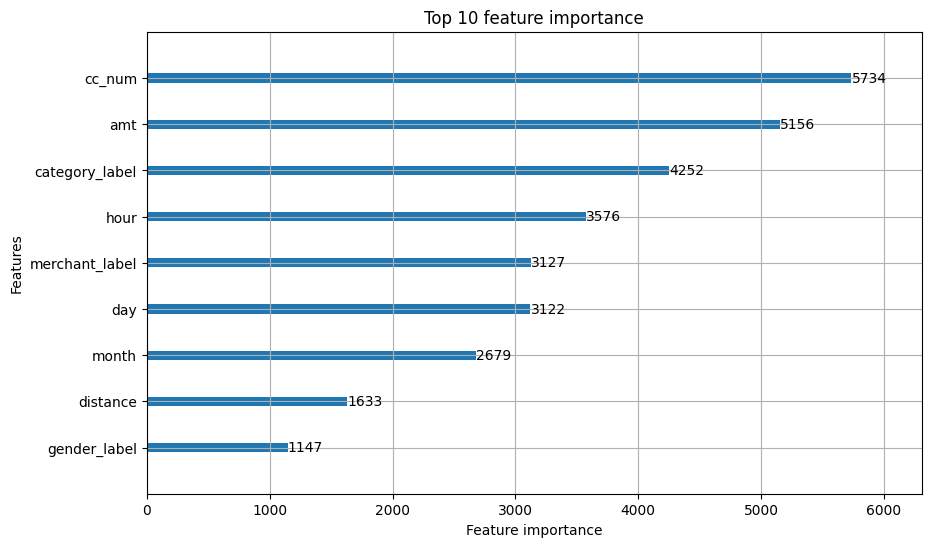

In [ ]:
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', figsize=(10, 6))
plt.title("Top 10 feature importance")
plot.show()

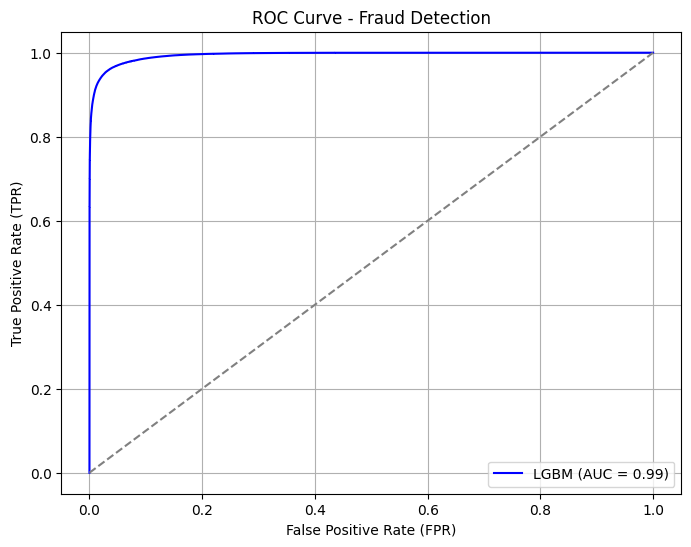

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (fraud)
y_prob = lgb_model.predict_proba(x_test)[:, 1]

# Compute FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='LGBM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # baseline
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Fraud Detection')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib
joblib.dump(lgb_model, "Fraud_detection_part_2.jb")
joblib.dump(le_encoder, "Label_encoder.jb")

['Label_encoder.jb']

In [ ]:
!cp Fraud_detection_part_2.jb /content/drive/MyDrive/Online_fraud_detection
!cp Label_encoder.jb /content/drive/MyDrive/Online_fraud_detection

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
!ngrok config add-authtoken "2yg6CR9tnGVG5f3TyrApHgtF5l3_7JubKYVJ9hBbmy6As7pR7"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!nohup streamlit run detector.py --server.enableCORS false --server.enableXsrfProtection false &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
import os

# Kill any running streamlit processes
!pkill streamlit

# Run the app in background
os.system("streamlit run /content/drive/MyDrive/Online_fraud_detection/detector.py &")

# Open the port using ngrok
public_url = ngrok.connect("http://localhost:8501")
print("🌐 Your Streamlit app is live at:", public_url)

🌐 Your Streamlit app is live at: NgrokTunnel: "https://4a90-35-229-140-33.ngrok-free.app" -> "http://localhost:8501"
